<a href="https://colab.research.google.com/github/IT24103352/automated-waste-classification-ml/blob/main/Automated_Waste_Classification_using_Image_Based_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path


In [2]:
# Check runtime type: GPU recommended but NOT required for PR-I
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available?:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.19.0
GPU available?: []


In [3]:
# Install the Kaggle command-line tool
!pip -q install kaggle

# Upload your kaggle.json (you downloaded it from Kaggle in Part A)
from google.colab import files
print("👉 Click 'Choose Files' and select your kaggle.json")
uploaded = files.upload()

# Put it in the right place with secure permissions
import os, shutil
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 0o600)

# Quick check: prints kaggle CLI version if installed correctly
!kaggle --version


👉 Click 'Choose Files' and select your kaggle.json


Saving kaggle.json to kaggle.json
Kaggle API 1.7.4.5


In [4]:
# Downloads the zip file into /content
!kaggle datasets download -d techsash/waste-classification-data -p /content


Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
 96% 411M/427M [00:01<00:00, 228MB/s]
100% 427M/427M [00:01<00:00, 279MB/s]


In [5]:
# Unzip to a folder we control
!mkdir -p /content/kaggle_data
!unzip -q /content/waste-classification-data.zip -d /content/kaggle_data

# Peek at the structure
!ls -R /content/kaggle_data | sed -n '1,120p'


/content/kaggle_data:
dataset
DATASET

/content/kaggle_data/dataset:
DATASET

/content/kaggle_data/dataset/DATASET:
TEST
TRAIN

/content/kaggle_data/dataset/DATASET/TEST:
O
R

/content/kaggle_data/dataset/DATASET/TEST/O:
O_12568.jpg
O_12569.jpg
O_12570.jpg
O_12571.jpg
O_12572.jpg
O_12573.jpg
O_12574.jpg
O_12575.jpg
O_12576.jpg
O_12577.jpg
O_12578.jpg
O_12579.jpg
O_12580.jpg
O_12581.jpg
O_12582.jpg
O_12583.jpg
O_12584.jpg
O_12585.jpg
O_12586.jpg
O_12587.jpg
O_12588.jpg
O_12589.jpg
O_12590.jpg
O_12591.jpg
O_12592.jpg
O_12593.jpg
O_12594.jpg
O_12595.jpg
O_12596.jpg
O_12597.jpg
O_12598.jpg
O_12599.jpg
O_12600.jpg
O_12601.jpg
O_12602.jpg
O_12603.jpg
O_12604.jpg
O_12605.jpg
O_12606.jpg
O_12607.jpg
O_12608.jpg
O_12609.jpg
O_12610.jpg
O_12611.jpg
O_12612.jpg
O_12613.jpg
O_12614.jpg
O_12615.jpg
O_12616.jpg
O_12617.jpg
O_12618.jpg
O_12619.jpg
O_12620.jpg
O_12621.jpg
O_12622.jpg
O_12623.jpg
O_12624.jpg
O_12625.jpg
O_12626.jpg
O_12627.jpg
O_12628.jpg
O_12629.jpg
O_12630.jpg
O_12631.jpg
O_12632.jpg

In [6]:
!ls -R /content/kaggle_data | head -50


/content/kaggle_data:
dataset
DATASET

/content/kaggle_data/dataset:
DATASET

/content/kaggle_data/dataset/DATASET:
TEST
TRAIN

/content/kaggle_data/dataset/DATASET/TEST:
O
R

/content/kaggle_data/dataset/DATASET/TEST/O:
O_12568.jpg
O_12569.jpg
O_12570.jpg
O_12571.jpg
O_12572.jpg
O_12573.jpg
O_12574.jpg
O_12575.jpg
O_12576.jpg
O_12577.jpg
O_12578.jpg
O_12579.jpg
O_12580.jpg
O_12581.jpg
O_12582.jpg
O_12583.jpg
O_12584.jpg
O_12585.jpg
O_12586.jpg
O_12587.jpg
O_12588.jpg
O_12589.jpg
O_12590.jpg
O_12591.jpg
O_12592.jpg
O_12593.jpg
O_12594.jpg
O_12595.jpg
O_12596.jpg
O_12597.jpg
O_12598.jpg
O_12599.jpg
O_12600.jpg
O_12601.jpg


In [7]:
from pathlib import Path

# Point to the right folder (case-sensitive!)
DATASET_DIR = Path("/content/kaggle_data/dataset/DATASET")

TRAIN_DIR = DATASET_DIR / "TRAIN"
TEST_DIR  = DATASET_DIR / "TEST"

print("DATASET_DIR:", DATASET_DIR)
print("TRAIN_DIR exists?", TRAIN_DIR.exists())
print("TEST_DIR exists?", TEST_DIR.exists())


DATASET_DIR: /content/kaggle_data/dataset/DATASET
TRAIN_DIR exists? True
TEST_DIR exists? True


🟢 EDA for Waste Classification Dataset




In [8]:
# ==========================================================
# STUDENT A - Basic Dataset Info
# ==========================================================
import os

# Count total images in train and test
num_train = sum([len(files) for r, d, files in os.walk(TRAIN_DIR)])
num_test = sum([len(files) for r, d, files in os.walk(TEST_DIR)])

print("Total Training Images:", num_train)
print("Total Testing Images:", num_test)

# Classes inside train directory
classes = os.listdir(TRAIN_DIR)
print("Classes:", classes)

# Number of images per class
for cls in classes:
    print(cls, ":", len(os.listdir(TRAIN_DIR / cls)))


Total Training Images: 22564
Total Testing Images: 2513
Classes: ['O', 'R']
O : 12565
R : 9999


Sample class: O


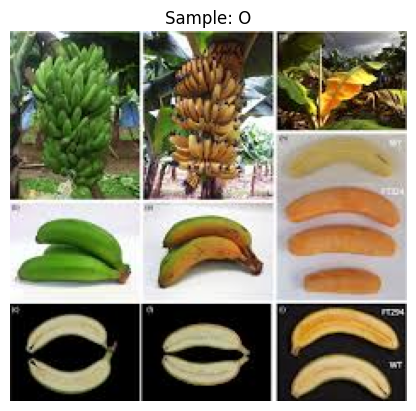

In [16]:
# ==========================================================
# STUDENT B - Check Example Images
# ==========================================================
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Pick a random class and image
sample_class = random.choice(classes)
sample_img_path = TRAIN_DIR / sample_class / random.choice(os.listdir(TRAIN_DIR / sample_class))

print("Sample class:", sample_class)
img = mpimg.imread(sample_img_path)

plt.imshow(img)
plt.title(f"Sample: {sample_class}")
plt.axis("off")
plt.show()


In [17]:
# ==========================================================
# STUDENT C - Check Image Sizes
# ==========================================================
from PIL import Image
import numpy as np

image_shapes = []
for cls in classes:
    img_path = TRAIN_DIR / cls / os.listdir(TRAIN_DIR / cls)[0]  # take one sample per class
    img = Image.open(img_path)
    image_shapes.append(np.array(img).shape)

print("Image Shapes (sample per class):", image_shapes)


Image Shapes (sample per class): [(137, 368, 3), (246, 205, 3)]


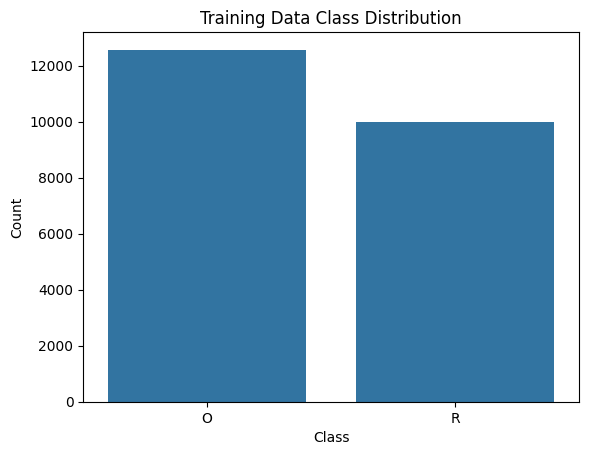

In [18]:
# ==========================================================
# STUDENT D - Distribution of Classes
# ==========================================================
import seaborn as sns
import pandas as pd

# Build a dataframe of class counts
class_counts = {cls: len(os.listdir(TRAIN_DIR / cls)) for cls in classes}
df_counts = pd.DataFrame(list(class_counts.items()), columns=["Class", "Count"])

# Plot
sns.barplot(x="Class", y="Count", data=df_counts)
plt.title("Training Data Class Distribution")
plt.show()


In [19]:
# ==========================================================
# STUDENT E - Check Image Channels
# ==========================================================
sample_img = mpimg.imread(sample_img_path)
print("Image shape:", sample_img.shape)
print("Number of channels:", sample_img.shape[-1] if len(sample_img.shape) == 3 else 1)


Image shape: (217, 233, 3)
Number of channels: 3


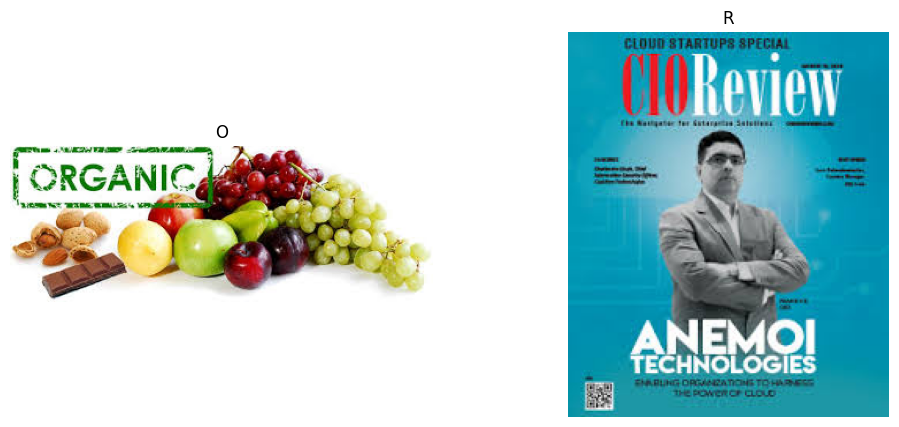

In [20]:
# ==========================================================
# STUDENT F - Few Samples per Class
# ==========================================================
fig, axs = plt.subplots(1, len(classes), figsize=(12, 5))

for i, cls in enumerate(classes):
    img_path = TRAIN_DIR / cls / os.listdir(TRAIN_DIR / cls)[0]
    img = mpimg.imread(img_path)
    axs[i].imshow(img)
    axs[i].set_title(cls)
    axs[i].axis("off")

plt.show()


🟢 Preprocessing for Waste Classification Dataset

In [21]:
# ====================================================
# ✅ Preprocessing Summary
# Student A: Resize images → 224×224
# ====================================================

from pathlib import Path
import cv2
import numpy as np

IMG_SIZE = (224, 224)
TRAIN_DIR_O = Path("/content/kaggle_data/dataset/DATASET/TRAIN/O")
TRAIN_DIR_R = Path("/content/kaggle_data/dataset/DATASET/TRAIN/R")

def resize_image(img_path):
    img = cv2.imread(str(img_path))
    if img is None:
        print("Image not found:", img_path)
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, IMG_SIZE)
    return img

# Example: resize just a small sample for EDA
sample_img_O = resize_image(next(TRAIN_DIR_O.iterdir()))
print("Resized sample image shape:", sample_img_O.shape)


Resized sample image shape: (224, 224, 3)


In [22]:
# ====================================================
# Student B: Normalize pixels → 0–1 range
# ====================================================

# Using the resized image from Student A
img_normalized = sample_img_O / 255.0
print("Pixel range after normalization:", img_normalized.min(), img_normalized.max())


Pixel range after normalization: 0.0 1.0


In [23]:
# ====================================================
# Student C: Encode labels → One-hot format
# ====================================================

from tensorflow.keras.utils import to_categorical

# Assume 'O' = 0, 'R' = 1
labels = ["O", "R", "O", "O", "R"]
label_map = {"O":0, "R":1}
numeric_labels = [label_map[l] for l in labels]

# One-hot encode
one_hot_labels = to_categorical(numeric_labels)
print("One-hot encoded labels:\n", one_hot_labels)


One-hot encoded labels:
 [[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [24]:
# ====================================================
# Student D: Verify dataset structure (train/test counts)
# ====================================================

train_dir = Path("/content/kaggle_data/dataset/DATASET/TRAIN")
test_dir  = Path("/content/kaggle_data/dataset/DATASET/TEST")

train_counts = {cls.name: len(list(cls.iterdir())) for cls in train_dir.iterdir() if cls.is_dir()}
test_counts  = {cls.name: len(list(cls.iterdir())) for cls in test_dir.iterdir() if cls.is_dir()}

print("Training images per class:", train_counts)
print("Testing images per class:", test_counts)


Training images per class: {'O': 12565, 'R': 9999}
Testing images per class: {'O': 1401, 'R': 1112}


In [25]:
# ====================================================
#(IT24103352): Data augmentation for training set
# ====================================================

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a small sample generator for demonstration
train_generator = train_datagen.flow_from_directory(
    directory=str(train_dir),
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical'
)

sample_batch = next(train_generator)
print("Sample batch shape (images, labels):", sample_batch[0].shape, sample_batch[1].shape)


Found 22564 images belonging to 2 classes.
Sample batch shape (images, labels): (8, 224, 224, 3) (8, 2)


In [26]:
# ====================================================
# Student F: Finalize test generator with rescale only
# ====================================================

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=str(test_dir),
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    shuffle=False
)

sample_test_batch = next(test_generator)
print("Test batch shape (images, labels):", sample_test_batch[0].shape, sample_test_batch[1].shape)


Found 2513 images belonging to 2 classes.
Test batch shape (images, labels): (8, 224, 224, 3) (8, 2)
